<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/yanginsuk/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import scipy.io
mat = scipy.io.loadmat('/content/gdrive/My Drive/MyColab/Data/data10_2.mat')

In [ ]:
X=mat.get('data')
X=X
X.shape

(400, 2)

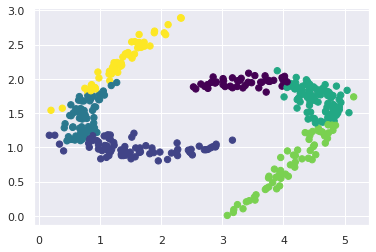

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.    0.    0.    1.   ]
 [0.    0.999 0.001 0.    0.    0.   ]
 [0.    0.    0.976 0.    0.    0.024]
 [0.    0.009 0.991 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]]


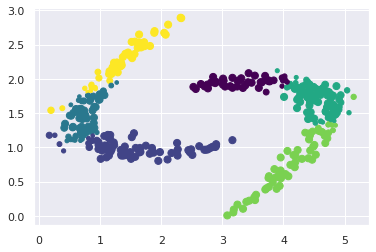

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

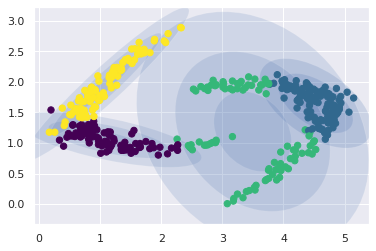

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

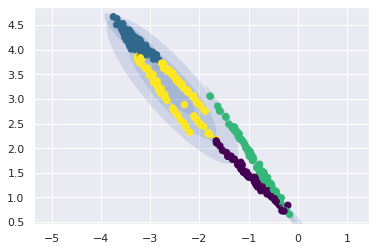

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

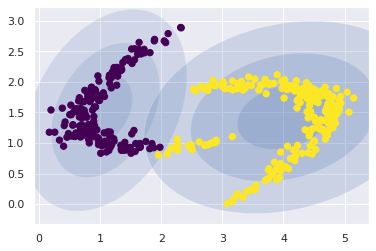

In [ ]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, X)

# 모델 피팅 통계량
대부분의 경우, 성분 개수 k와 적합한 공분산 구조 Σ는 알 수 없습니다. GMM을 조정할 수 있는 한 가지 방법은 정보 기준을 비교하는 것입니다. 많이 사용되는 두 가지 정보 기준은 아카이케 정보 기준(AIC: Akaike Information Criterion)과 베이즈 정보 기준(BIC: Bayesian Information Criterion)입니다.

AIC와 BIC 모두 최적화된 음의 로그 가능도를 취한 후 모델에 포함된 모수 개수로 벌점을 적용합니다(모델 복잡도). 그러나 BIC가 AIC에 비해 더 엄격하게 복잡도에 대해 벌점을 적용합니다. 따라서, AIC는 과적합될 수 있는 더 복잡한 모델을 선택하는 경향이 있고 BIC는 과소적합될 수 있는 더 단순한 모델을 선택하는 경향이 있습니다. 그러므로 모델을 평가할 때 두 기준을 모두 검토하는 것이 좋습니다. AIC 값이나 BIC 값이 낮을수록 더 나은 피팅 모델임을 나타냅니다. 또한 k에 대해 선택한 값과 공분산 행렬 구조가 현재 응용 사례에 적합한지도 확인해야 합니다. fitgmdist는 피팅된 gmdistribution 모델 객체의 AIC와 BIC를 속성 AIC와 BIC에 저장합니다. 점 표기법을 사용하여 이러한 속성에 액세스할 수 있습니다.

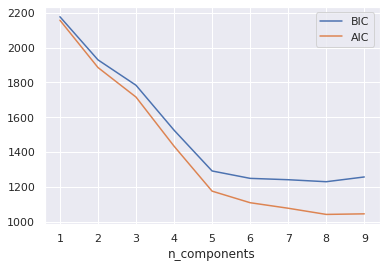

In [ ]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');